<h1> Question A</h1>

In [1]:
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
import numba
from numba import jit
from scipy.ndimage.filters import convolve
%matplotlib inline

In [2]:
@numba.jit
def pixel_energy(img):
    sobel_y = np.array([[1.0, 2.0, 1.0],[0.0, 0.0, 0.0],[-1.0, -2.0, -1.0],])

    sobel_y = np.stack([sobel_y]*3, axis=2)

    sobel_x = np.array([[1.0, 0.0, -1.0],[2.0, 0.0, -2.0],[1.0, 0.0, -1.0],])

    sobel_x = np.stack([sobel_x]*3, axis=2)

    img = img.astype('float32')
    convolved = np.absolute(convolve(img, sobel_y)) + np.absolute(convolve(img, sobel_x))

    energy = convolved.sum(axis=2)
    
    return energy

In [3]:
@numba.jit
def min_seam (img):
    energy = pixel_energy(img)
    h,w = img.shape[:2]
    parent = np.zeros((h,w), dtype=int)
    for i in range(1,h):
        for j in range(w):
            if j==0:
                ind = np.argmin(energy[i-1][j:j+2])
                parent[i,j] = ind + j 
                min_energy = energy[i-1,ind+j]
            else:
                ind = np.argmin(energy[i-1][j-1:j+2])
                parent[i,j] = ind + j - 1 
                min_energy = energy[i-1,ind+j-1]                    
                
            energy[i][j] += min_energy

    return energy, parent

In [4]:
@numba.jit
def seam_carving (img):
    
    energy, parent = min_seam(img)
    h,w = img.shape[:2]
    seam = np.ones((h,w), dtype=bool)
    
    remove = np.argmin(energy[h-1])

    for i in range(h-1,-1,-1):
            seam[i][remove] = False
            remove = parent[i][remove]
            
    seam = np.stack([seam]*3, axis=2)
    img = img[seam].reshape((h, w-1, 3))
        
    return img

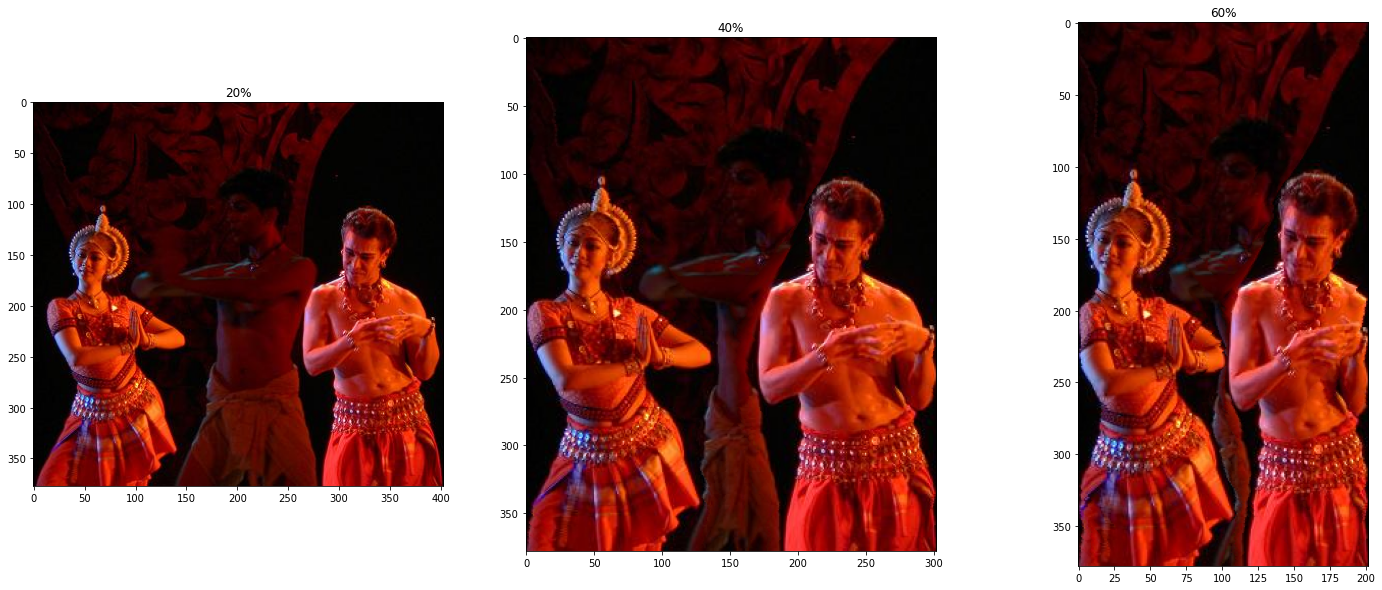

In [7]:
#start = time.time()
img20 = cv2.imread('bangalore-dancers.jpg')
img40 = cv2.imread('bangalore-dancers.jpg')
img60 = cv2.imread('bangalore-dancers.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

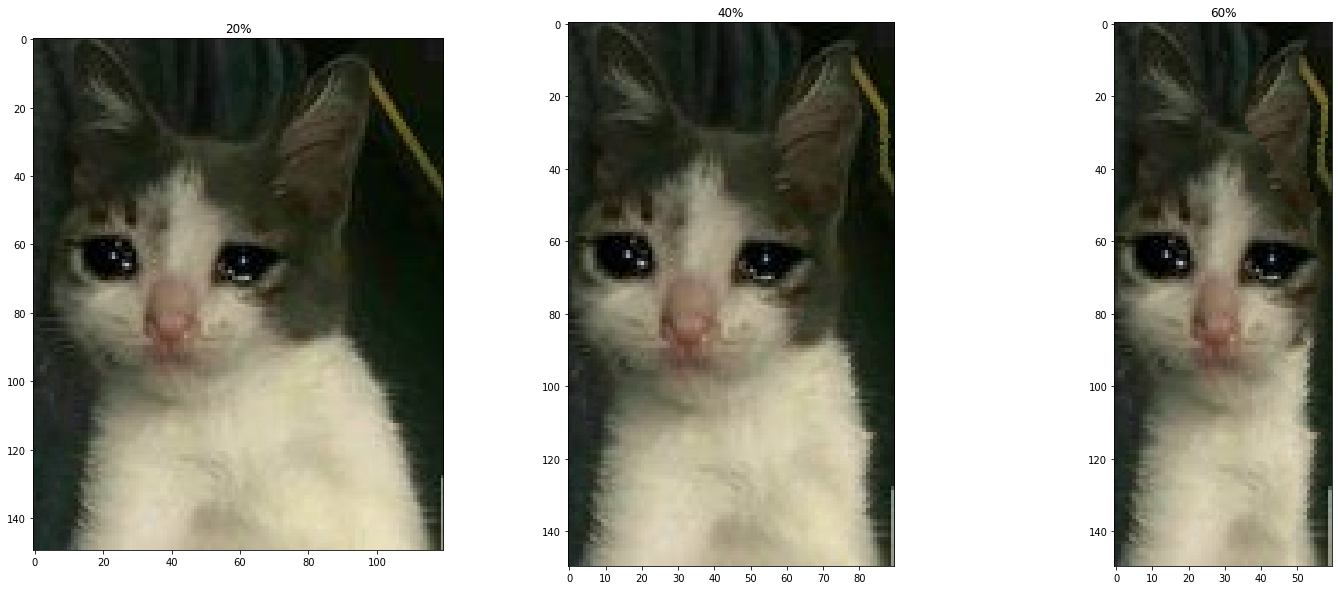

In [8]:
#start = time.time()
img20 = cv2.imread('cat.jpg')
img40 = cv2.imread('cat.jpg')
img60 = cv2.imread('cat.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

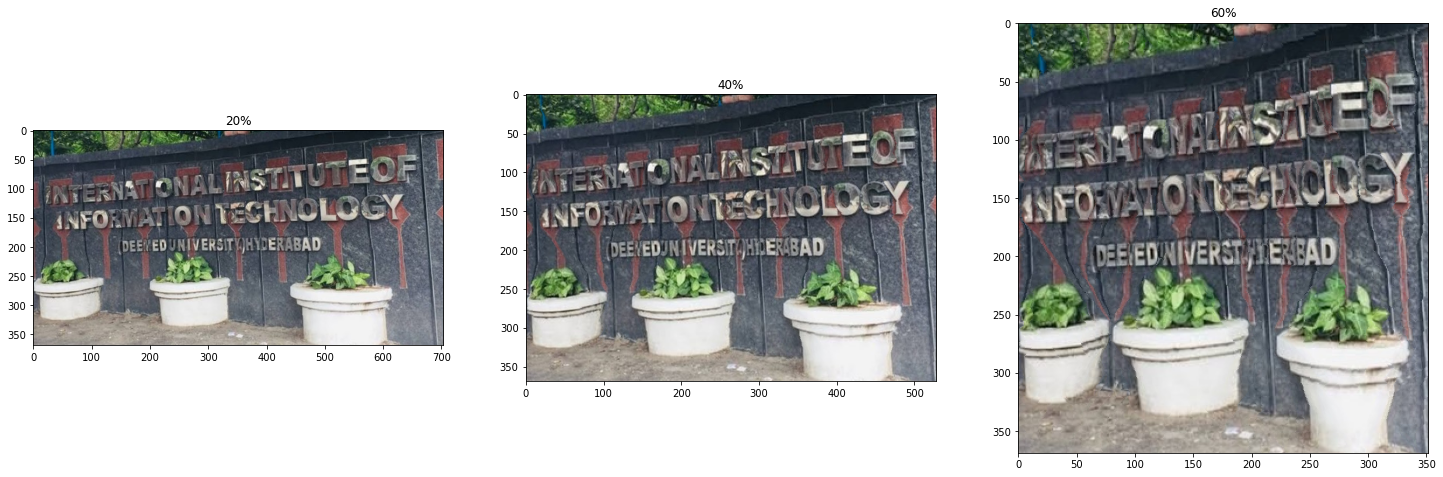

In [9]:
#start = time.time()
img20 = cv2.imread('iiit.jpg')
img40 = cv2.imread('iiit.jpg')
img60 = cv2.imread('iiit.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

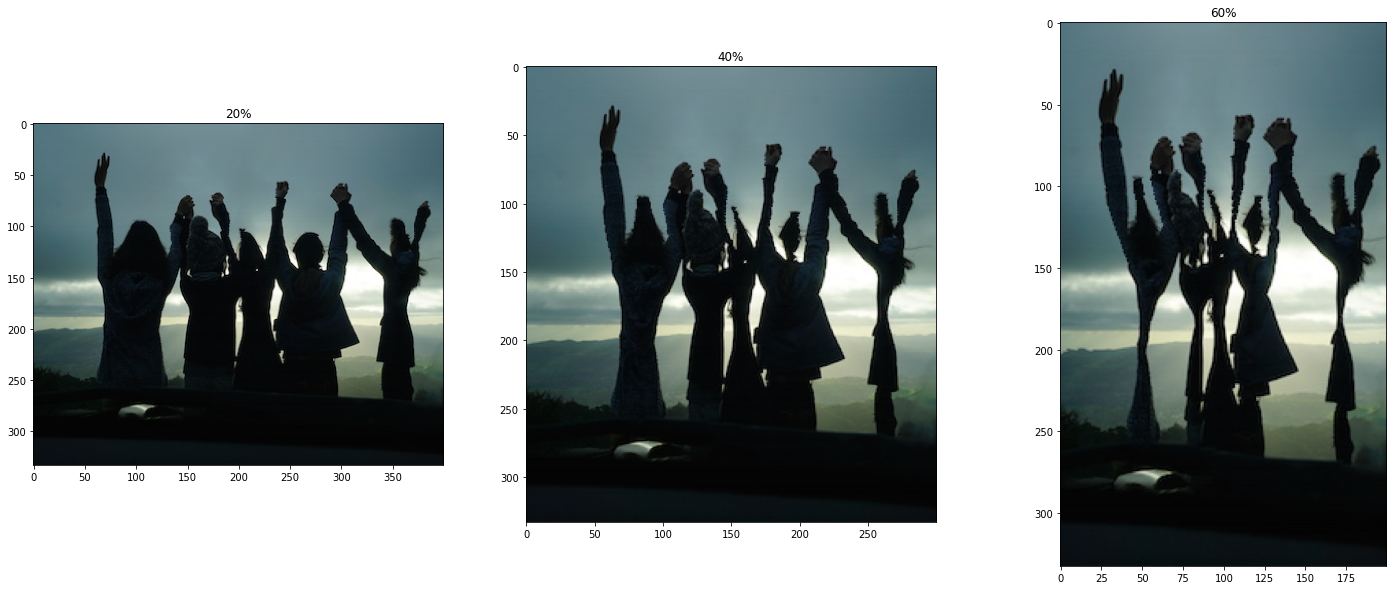

In [10]:
#start = time.time()
img20 = cv2.imread('shadow.jpg')
img40 = cv2.imread('shadow.jpg')
img60 = cv2.imread('shadow.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

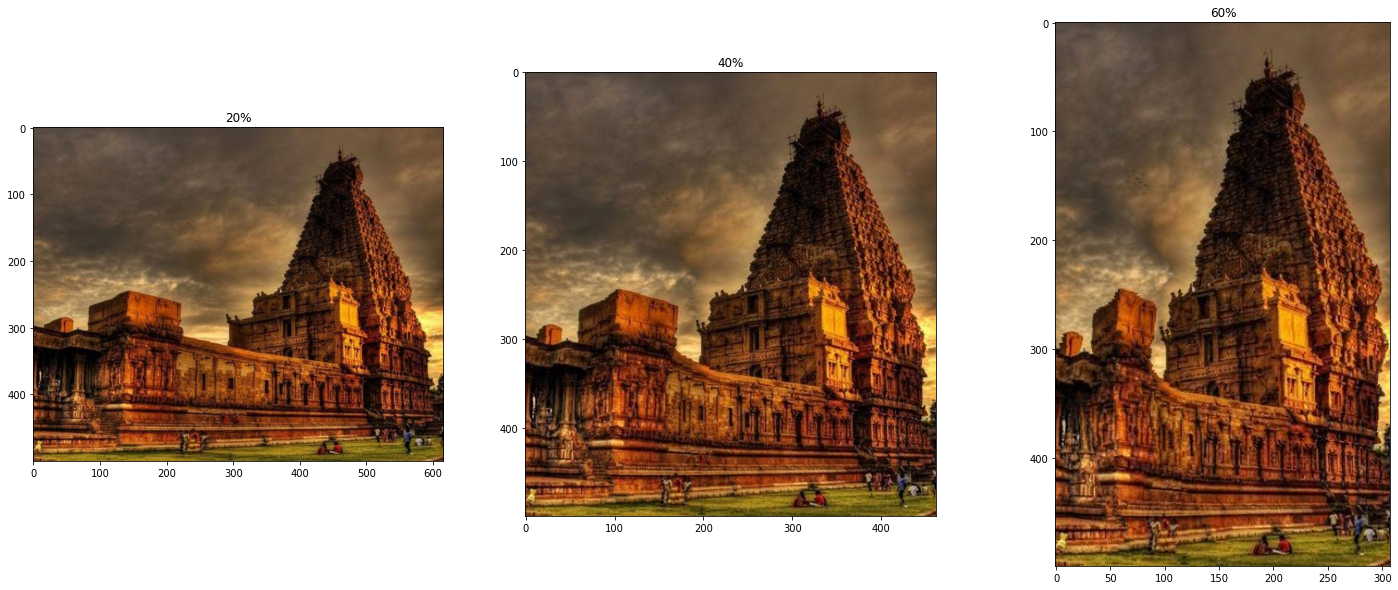

In [11]:
#start = time.time()
img20 = cv2.imread('tanjore.jpg')
img40 = cv2.imread('tanjore.jpg')
img60 = cv2.imread('tanjore.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

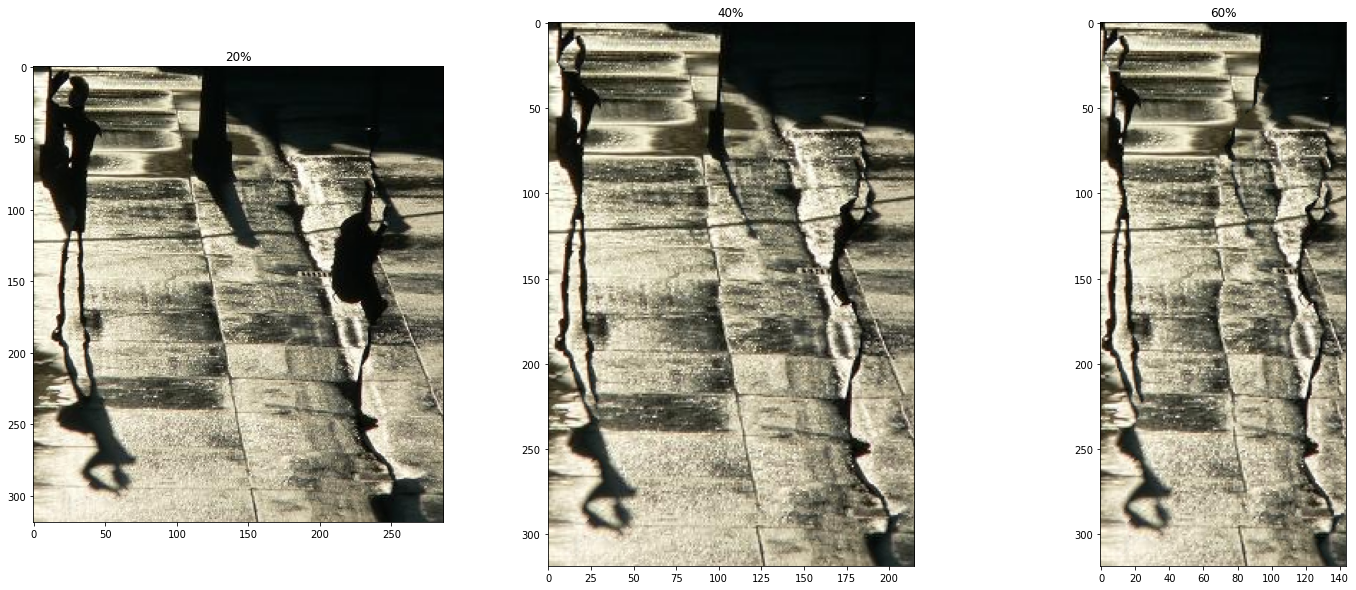

In [12]:
#start = time.time()
img20 = cv2.imread('trafalgar-square.jpg')
img40 = cv2.imread('trafalgar-square.jpg')
img60 = cv2.imread('trafalgar-square.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

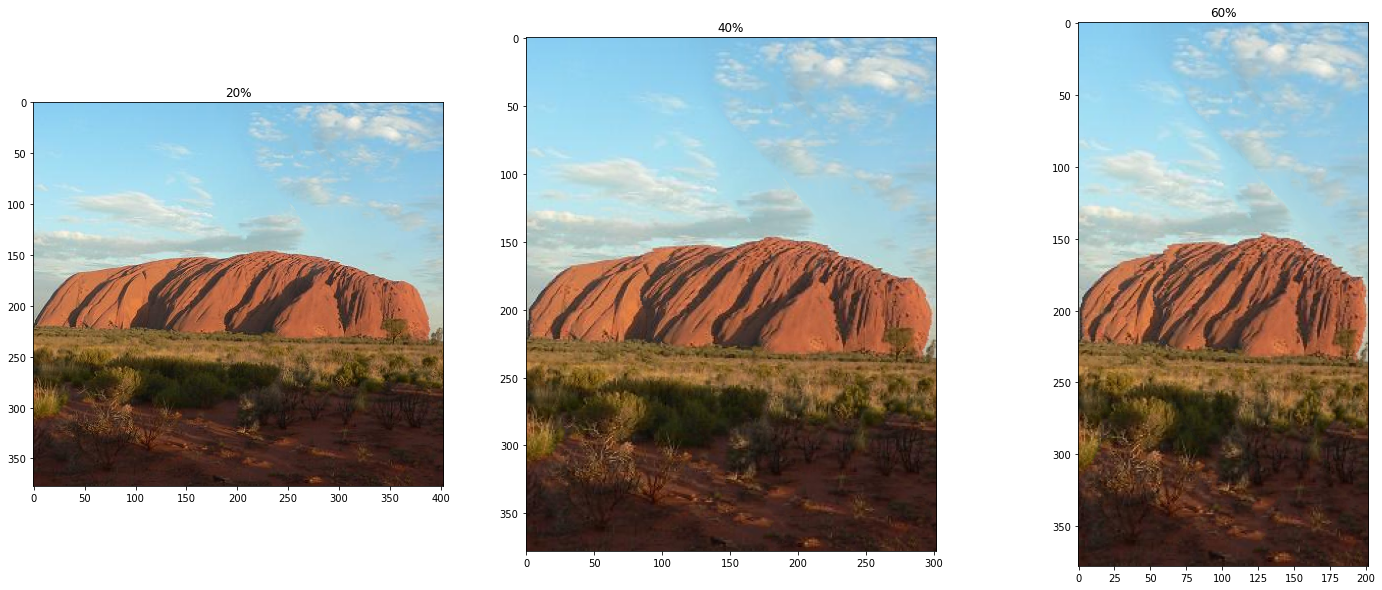

In [13]:
#start = time.time()
img20 = cv2.imread('uluru.jpg')
img40 = cv2.imread('uluru.jpg')
img60 = cv2.imread('uluru.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
#img = np.rot90(img, 3, (0, 1))
    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*w)
for i in range(k):
    img40 = seam_carving(img40)

fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

percent = 0.6
h,w = img60.shape[:2]
k = round(percent*w)
for i in range(k):
    img60 = seam_carving(img60)

fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

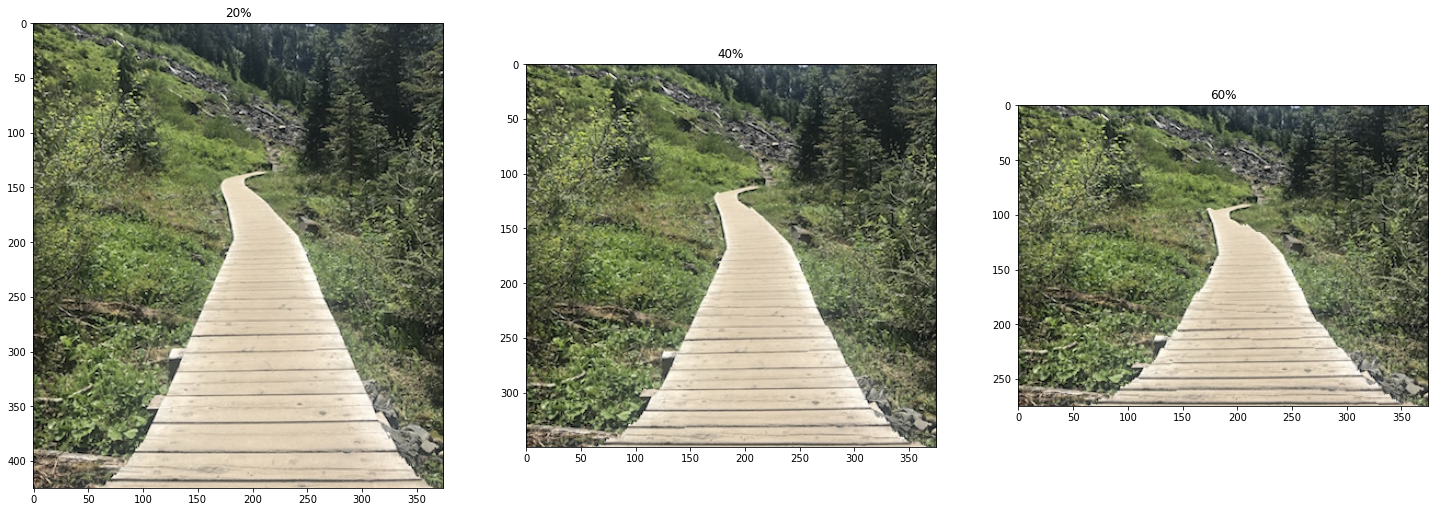

In [19]:
#start = time.time()
img20 = cv2.imread('path.jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.imread('path.jpg')
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
img60 = cv2.imread('path.jpg')
img60 = cv2.cvtColor(img60, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

img20 = np.rot90(img20, 1, (0, 1))
percent = 0.2
h,w = img20.shape[:2]
k = round(percent*h)
for i in range(k):
    img20 = seam_carving(img20)
img20 = np.rot90(img20, 3, (0, 1))
fig.add_subplot(1,3,1)
plt.imshow(img20)    
plt.title('20%')
    
img40 = np.rot90(img40, 1, (0, 1))    
percent = 0.4
h,w = img40.shape[:2]
k = round(percent*h)
for i in range(k):
    img40 = seam_carving(img40)
img40 = np.rot90(img40, 3, (0, 1))
fig.add_subplot(1,3,2)
plt.imshow(img40)
plt.title('40%')

img60 = np.rot90(img60, 1, (0, 1))    
percent = 0.6
h,w = img60.shape[:2]
k = round(percent*h)
for i in range(k):
    img60 = seam_carving(img60)
img60 = np.rot90(img60, 3, (0, 1))
fig.add_subplot(1,3,3)
plt.imshow(img60)
plt.title('60%')
plt.show()
#end = time.time()
#print(end - start)

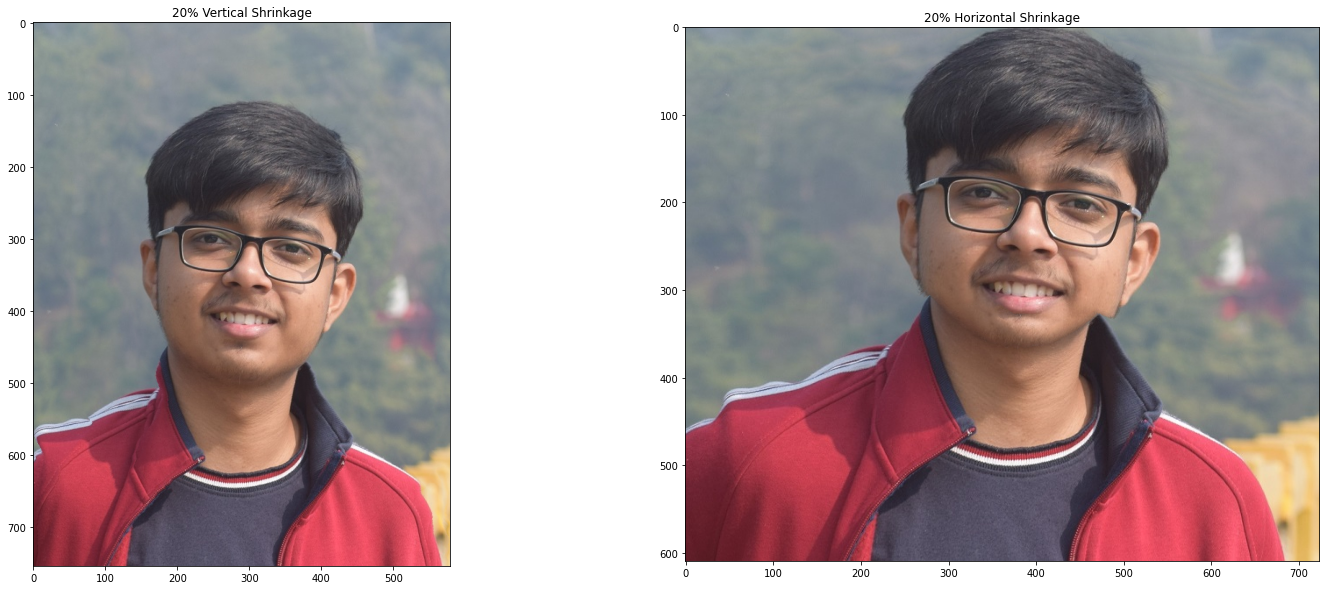

In [20]:
#start = time.time()
img20 = cv2.imread('self.JPG')
img40 = cv2.imread('self.JPG')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img40 = cv2.cvtColor(img40, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(25,10))
#print(img.shape)

#img = np.rot90(img, 1, (0, 1))

percent = 0.2
h,w = img20.shape[:2]
k = round(percent*w)
for i in range(k):
    img20 = seam_carving(img20)

fig.add_subplot(1,2,1)
plt.imshow(img20)    
plt.title('20% Vertical Shrinkage')
#img = np.rot90(img, 3, (0, 1))

img40 = np.rot90(img40, 1, (0, 1))
percent = 0.2
h,w = img40.shape[:2]
k = round(percent*h)
for i in range(k):
    img40 = seam_carving(img40)
img40 = np.rot90(img40, 3, (0, 1))
fig.add_subplot(1,2,2)
plt.imshow(img40)
plt.title('20% Horizontal Shrinkage')
plt.show()
#end = time.time()
#print(end - start)

<h3> Summary of test on following images for 20%, 40%, 60% shrinkage</h3>


|                                   |           20%           |           40%          |           60%          |
|:---------------------------------:|:-----------------------:|:----------------------:|:----------------------:|
|       Bangalore-<br>dancers       |  (378x403)<br>3.475 sec | (378x302)<br>6.122 sec | (378x202)<br>8.183 sec |
|                Cat                |  (150120)<br>0.166 sec |  (150x90)<br>0.273 sec |  (150x60)<br>0.372 sec |
|                IIIT               |  (369x704)<br>10.29 sec | (369x528)<br>18.25 sec | (369x352)<br>23.47 sec |
|               shadow              |  (333x400)<br>2.98 sec  |  (333x300)<br>5.31 sec | (333x200)<br>7.082 sec |
|              Tanjore              | (500x616)<br>10.70 sec | (500x462)<br>19.03 sec | (500x308)<br>24.42 sec |
|        Trafalgar-<br>Square       |  (319x287)<br>1.51 sec  |  (319x215)<br>2.76 sec |  (319x144)<br>3.55 sec |
|               Uluru               |  (378x403)<br>3.52 sec  |  (378x302)<br>6.02 sec |  (378x202)<br>8.33 sec |
| Path<br>(Horizontal<br>shrinkage) |  (400x375)<br>5.37 sec  |  (300x375)<br>5.95 sec |  (200x375)<br>7.82 sec |

<h1> Question B</h1>

Lets analyse for vertical shrinkage, complexity for horizontal shrinkage would be similar. Lets say we want to shrink by `K` seams, complexity for using dynamic programming for calculating seams is $O(HW)$, where `H` and `W` ae height and widht of image. Selecting the minimum energy seam takes $O(H)$, and since we want to remove `K` seams, the overall complexity of this algorithm is $O(K(HW + H))$.

Say the dimensions of image if `H x W`, then maximum number of vertical seams is `W`. In the naive solution we find energy for every possible seam, therefore its complexity becomes $O(K(W^H))$, since we want to remove `K` seams and each time finding the minimum energy seam will take $O(W^H)$ hence, complexity of naive solution becomes $O(K(W^H))$.

<h1> Question C </h1>

Flipping the image will not change the energy of the image, since energy is calculated using the neighbors of a pixel and rotating the image does not affect the neighbors of a pixel hence its energy wouldn't change and the result will be still the same only the ouput image will also be flipped.

If we want to remove both horizontal and vertical seams, then lets calculate both the minimum horizontal and vertical seam, then in the carving function, we remove the seam which has lower energy, i.e. if minimum energy horizontal seam has lesser energy than minimum energy vertical seam, then we remove the horizontal seam. In this way we ensure that the we remove the best seam with minimum energy among both directions and thus this method will also reduce distortions in the image as much as possible while at same time reducing the dimensions of image 